This notebook demonstrates the use of CREIME_RT, which is an improved version of [CREIME](https://doi.org/10.1029/2022JB024595), for real-time earthquake identification and magnitude estimation.

In [1]:
import sys
sys.path.insert(0, '..')

## (1) Testing on STEAD Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [2]:
from saipy.data.base import STEAD
stead = STEAD('/home/seismoai/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


### $(\mathrm{ii})$ Getting Data and Labels in the format for CREIME_RT

In [3]:
X, y = stead.get_creime_rt_data(stead.trace_list()[-20:])

100%|██████████| 20/20 [00:01<00:00, 13.47it/s]


In [4]:
len(X), y.shape

(20, (20, 6000))

In [5]:
from saipy.utils.visualizations import plot_creime_rt_data

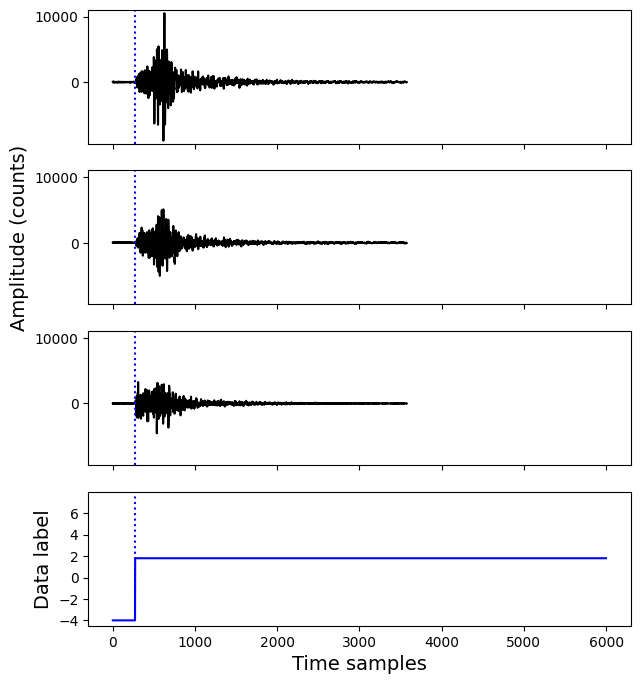

In [6]:
plot_creime_rt_data(X[6], y[6])

### $(\mathrm{iii})$ Loading CREIME_RT

In [7]:
from saipy.models.creime import CREIME_RT
creime_rt = CREIME_RT()
print(creime_rt)

2023-08-17 15:11:43.283054: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6000, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6000, 8)      3080        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 6000, 8)      48000       ['conv1d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 6000, 8)      0           ['p_re_lu[0][0]']                
                                                                                              

In [8]:
y_pred, predictions = creime_rt.predict(X)

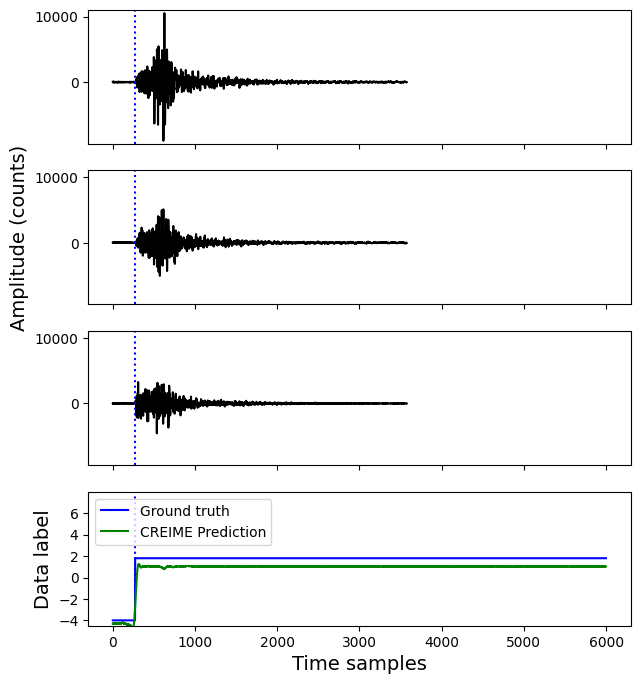

In [9]:
plot_creime_rt_data(X[6], y[6], y_pred[6])

In [10]:
predictions

[(1, 0.9),
 (1, 0.3),
 (1, 0.4),
 (1, 0.7),
 (1, 0.4),
 (1, 1.5),
 (1, 1.0),
 (1, 0.7),
 (1, 0.8),
 (1, 0.7),
 (1, 1.3),
 (1, 1.0),
 (1, 0.7),
 (1, 0.7),
 (1, 0.9),
 (1, 0.5),
 (1, 1.4),
 (1, 1.2),
 (1, 0.8),
 (1, 0.9)]

## (2) Testing on INSTANCE Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [11]:
import sys
sys.path.insert(0, '..')
from saipy.data.base import INSTANCE
instance = INSTANCE('/home/seismoai/data')
print(instance)

,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
0,20050103T055721,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,60.0,0.0,0.0,0.0,20050103T055721.MN.CUC..HH,0,1,0.0,0.0,0.0
1,20050107T055514,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,70.0,0.0,0.0,0.0,20050107T055514.MN.CUC..HH,0,0,0.0,0.0,0.0
2,20050110T014724,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,35.0,0.0,0.0,0.0,20050110T014724.MN.CUC..HH,0,0,0.0,0.0,0.0
3,20050115T171350,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,71.0,0.0,0.0,0.0,20050115T171350.MN.CUC..HH,0,2,0.0,0.0,0.0
4,20050116T210022,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,190.0,0.0,0.0,0.0,20050116T210022.MN.CUC..HH,0,1,0.0,0.0,0.0


,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_sa03_cmps2,trace_sa10_cmps2,trace_sa30_cmps2,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number,trace_deconvolved_units
0,10000541,MN,AQU,NaN,HH,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000812,0.000071,0.000019,10000541.MN.AQU..HH,1.0,1.0,1.0,1.0,1.0,mps
1,10000541,MN,AQU,NaN,HL,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000836,0.000135,0.000050,10000541.MN.AQU..HL,NaN,NaN,NaN,NaN,NaN,mps2
2,10000541,IV,ARRO,NaN,EH,42.57917,12.76567,253.0,549.0,Vs30 extracted from ShakeMap,...,0.000871,0.000046,0.000022,10000541.IV.ARRO..EH,2.0,1.0,1.0,1.0,1.0,mps
3,10000541,IV,ASSB,NaN,HH,43.04260,12.65870,734.0,412.0,Vs30 extracted from ShakeMap,...,0.001400,0.000068,0.000015,10000541.IV.ASSB..HH,1.0,7.0,1.0,1.0,1.0,mps
4,10000541,IV,ATCC,NaN,EH,43.18514,12.63994,557.0,667.0,Vs30 extracted from ShakeMap,...,0.001339,0.000057,0.000028,10000541.IV.ATCC..EH,1.0,3.0,1.0,1.0,1.0,mps


INSTANCE Dataset


### $(\mathrm{ii})$ Getting Data and Labels in the format for CREIME_RT

In [12]:
X, y = instance.get_creime_rt_data(traces_n = instance.trace_list_noise()[:10], traces_ev = instance.trace_list_events()[:10])

100%|██████████| 10/10 [00:00<00:00, 181.28it/s]

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


In [13]:
len(X), y.shape

(20, (20, 6000))

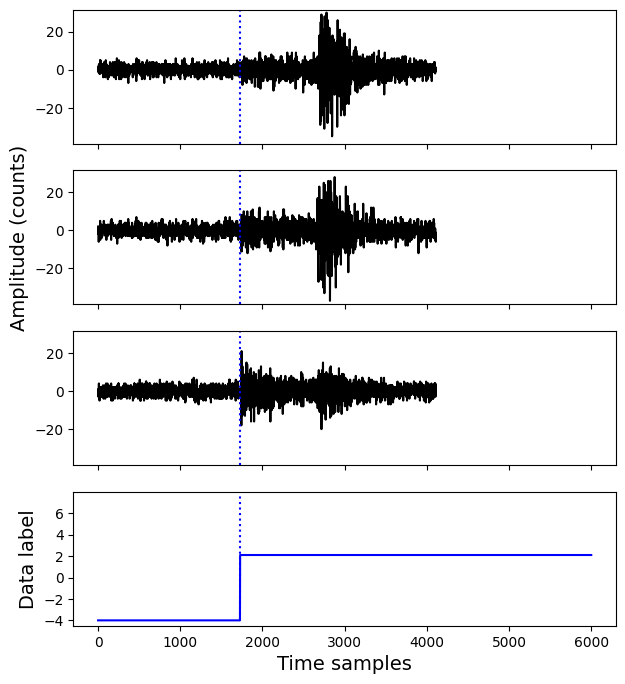

In [14]:
plot_creime_rt_data(X[16], y[16])

### $(\mathrm{iii})$ Testing CREIME_RT

In [15]:
y_pred, predictions = creime_rt.predict(X)

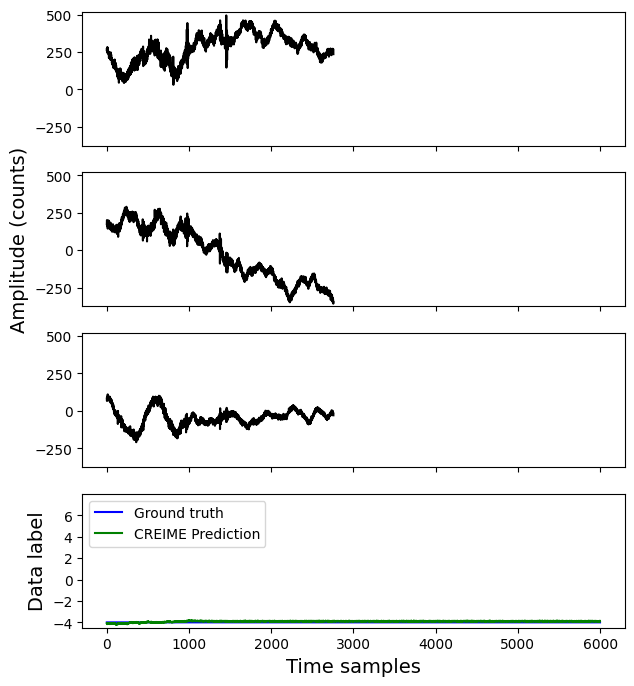

In [16]:
plot_creime_rt_data(X[6], y[6], y_pred[6])

In [17]:
predictions

[(1, 1.8),
 (1, -0.4),
 (0, None),
 (0, None),
 (0, None),
 (1, 0.6),
 (0, None),
 (0, None),
 (0, None),
 (1, 2.1),
 (1, 0.9),
 (0, None),
 (1, 2.2),
 (0, None),
 (1, 0.3),
 (1, 1.8),
 (0, None),
 (1, 1.8),
 (0, None),
 (1, 1.3)]

## (3) Retraining

In [18]:
X, y = stead.get_creime_rt_data(stead.trace_list()[-2000:], training = True)

100%|██████████| 2000/2000 [03:57<00:00,  8.43it/s]


In [19]:
model = creime_rt.get_model(untrained = True)

In [20]:
model.fit(X,y, epochs = 10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'custom_loss3/GatherV2' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2207918/432769321.py", line 1, in <module>
      model.fit(X,y, epochs = 10)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/seismoai/data/DeepSeis_main/examples/../saipy/models/creime.py", line 56, in custom_loss3
      return mse(y_true, y_pred) * (1 + cos(y_true, y_pred)) + 5 * magn_estimation_loss(y_true, y_pred)
    File "/home/seismoai/data/DeepSeis_main/examples/../saipy/models/creime.py", line 30, in magn_estimation_loss
      m_true = tf.gather(y_true,-1, axis = -1)
Node: 'custom_loss3/GatherV2'
indices = -1 is not in [0, 6000)
	 [[{{node custom_loss3/GatherV2}}]] [Op:__inference_train_function_19229]